# **Twitter Dataset Exploration**

In [1]:
!pip install essential-generators
import random
from essential_generators import DocumentGenerator
import pandas as pd
gen = DocumentGenerator()
def gen_rating():
  return random.randrange(5000)
def gen_age():
  return random.randrange(10, 80)
template = {'id': 'guid',
'status': ['online', 'offline', 'anonymous'],
'gender': ['male', 'female'],
'email': 'email',
'age': gen_age,
'messages': gen_rating,
'likes': gen_rating,
'retweets': gen_rating,
'name': 'name',
'twitter post': 'sentence',
}
gen.set_template(template)
documents = gen.documents(50000)
df = pd.DataFrame(documents)
df = df.set_index('id')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 15.6 MB/s 


# **Starting exploring Twitter's Dataset**

In [3]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from IPython.display import HTML
import plotly.io as pio


In [4]:
df.head() #starting to explore the dataset

,status,gender,email,age,messages,likes,retweets,name,twitter post
id,,,,,,,,,
67d89f01-e1a9-4c68-9076-296429d2b991,offline,female,equirr@thron760.com,60,1487,2933,2721,Relike And,To have laser light either constitutes or imme...
664d09a0-1ed7-45b5-bc74-1457195380bc,offline,male,cest@ce.troman.fr,29,4492,4792,4096,70 Arrele,Allows object-level similarly partly filmed in...
650b8ea8-f30f-4165-a294-e7c7d6727c40,anonymous,female,th@of.progic.co.uk,68,928,3669,389,Actope Pution,And effect in pennants. The Chicago Blackhawks of
727d6ac9-8871-4405-ae0e-1e8c376cdd90,anonymous,female,The.hat@se.biz,49,3633,4636,2897,Coned Mons,Energy \n Information in the country with the ...
26e72bb4-e213-4000-97d8-f12e0d6c1a44,offline,female,Fral@weenta.the.fr,69,4049,4523,1760,The Ar,Printer. Distributed site that allows them to ...


In [5]:
#exploring general information and statistics about our dataset
df.describe()

,age,messages,likes,retweets
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.488420,2506.148580,2495.148200,2497.316520
std,20.188989,1436.839565,1443.296196,1444.857856
min,10.000000,0.000000,0.000000,0.000000
25%,27.000000,1271.000000,1243.000000,1246.750000
50%,44.000000,2502.000000,2478.000000,2495.000000
75%,62.000000,3749.000000,3754.000000,3748.000000
max,79.000000,4999.000000,4999.000000,4999.000000


In [7]:
#exporting to excel for easier titles formatting in powerpoint
df1 = df.head(3)
df1.to_excel("output.xlsx") 

In [8]:

df.columns

Index(['status', 'gender', 'email', 'age', 'messages', 'likes', 'retweets',
       'name', 'twitter post'],
      dtype='object')

In [ ]:
df.index

Index(['eafe22bf-f436-49d2-8790-176aa156a690',
       '32b8ce60-157d-4749-b8ac-0412b453025c',
       '9f082b66-c00c-4695-b1bc-dd2fef03e1c9',
       'da10e39e-73e3-4d56-8a22-f96f8c25899c',
       'ddd99be7-76dd-46ec-8e2d-d4775340f5a9',
       '1af66333-5609-482d-83bb-8a0c63a70529',
       '13d3bae2-578b-4c2e-aed2-feae19a650d5',
       'eebe6d22-d500-4be8-a07d-ea951ccb7b3a',
       'bc7c1f89-0cdb-4f22-941e-68b7c25b7f94',
       '3ca7415c-7401-442e-bc70-d99f3eff333b',
       ...
       'ac32d082-b3ac-4da6-afd1-55ff8502924f',
       '0a914a5e-77f6-4742-8089-2449c2775d06',
       '93920a20-8c69-4062-87ba-acdd19205124',
       '054b2001-0ab5-4668-a1fd-52cdd26e321a',
       'e6f1ebe4-d912-443f-ac9e-1e214c321c83',
       '30a6f9b3-1b59-4c7f-98e7-9be5d9cbd473',
       'aa0ab059-5657-4397-aa72-a2b109f0f8b5',
       'eb684bed-37ad-43c7-a98f-7d211c3a86f5',
       'd011e049-be92-42aa-9573-a00ddf8e0b73',
       '6a0169eb-996d-4736-8917-d55f3c40b81c'],
      dtype='object', name='id', length=50000)

# **Cleaning the Dataset**

In [14]:
#checking for missing values
df.isna().all() #there are no missing values in the Dataset

status          False
gender          False
email           False
age             False
messages        False
likes           False
retweets        False
name            False
twitter post    False
dtype: bool

In [30]:
#checking for duplicates in the email datapoint
df['email'].value_counts()

of@the.com              20
the@the.com             17
the@of.com              15
a@the.com               12
the@a.com               10
                        ..
fied@Utted.us            1
they.re@untles.com       1
a914@by.co.uk            1
bre@coment.the.com       1
inat@pridwa456.co.uk     1
Name: email, Length: 49314, dtype: int64

In [31]:
#dropping duplicate emails, keeping first instance
df.drop_duplicates(subset='email', inplace = True)

In [32]:
#sanity check
df['email'].value_counts() #done! no more duplicate emails

equirr@thron760.com     1
suble.ths@Union.com     1
a@of.org                1
cledic@poold915.com     1
loce.diniqu@fues.fr     1
                       ..
he@of.ru                1
rese@anis.com           1
ma@the.com              1
the@ascand.com          1
inat@pridwa456.co.uk    1
Name: email, Length: 49314, dtype: int64

# **Findinding insights on most retweeted posts per age group**

In [43]:
 #collecting general statistical information on data-point
df['retweets'].describe()

count    49314.000000
mean      2497.218315
std       1445.576370
min          0.000000
25%       1245.000000
50%       2495.000000
75%       3748.000000
max       4999.000000
Name: retweets, dtype: float64

In [34]:
df['likes'].describe()

count    49314.000000
mean      2494.616296
std       1443.744659
min          0.000000
25%       1241.250000
50%       2479.000000
75%       3754.000000
max       4999.000000
Name: likes, dtype: float64

In [36]:
#creating sub-dataset (top 25% of most retweeted posts)
interest_group = df[(df['retweets'] < 4999) & (df['retweets'] > 3737)]  
interest_group.sort_values('age', ascending = False).head()


,status,gender,email,age,messages,likes,retweets,name,twitter post
id,,,,,,,,,
3b734b57-117e-4ac5-b9c4-f4fd3a2ed0d0,online,male,res@mosion.com,79,3594,4318,4843,Lisens Coming,These more and devising
b5b216bf-4cac-46b0-bdda-c23afc52679c,online,female,Ethe@te.gov,79,1219,78,4200,Thente The,Slowly through Australia are
ec9aed3b-297c-407d-8260-e6a41681099a,offline,male,Carld@viclum.biz,79,1382,3451,4144,Ordiva Torm,"On logic, individuals was inverted into a rock..."
0d55f871-06fc-4311-9541-eb25565b0ae1,online,female,ducal@the.net,79,2029,2663,4242,They Felion,Bahamas territory important function is the st...
be6778a9-93d1-4128-8c1d-a84851734d67,anonymous,male,coverm@and803.com,79,3120,747,3873,Warlde Hich,Utilities such period (1185–1333) and became t...


In [37]:
#further segmenting
interest_group2 = interest_group[(interest_group['likes']>3760) & (interest_group['likes']<5000)]
interest_group2.sort_values('age', ascending = False).head()

,status,gender,email,age,messages,likes,retweets,name,twitter post
id,,,,,,,,,
9a7a5657-d8b7-47c3-9f23-1e9877a15b32,online,female,unduct210@Souns.Ausit.jp,79,790,3861,4794,Ingly Therel,Eyes moisten layouts and better
3f75281a-b3ff-4291-afea-2f56dddc44ae,online,male,The@thom.com,79,39,4611,4335,Sing A,Opportunities and which lasted 1885–1893. The ...
f51875b4-5896-49e0-8974-d99d54b60d52,anonymous,female,in@Tumadd.org,79,4141,4572,3940,Edusla Marly,England vicar operation and maintenance costs
4194a673-b998-4d62-bc58-69b4070cc996,offline,female,esch@ise.co.uk,79,1063,4932,4533,Bysion Mexied,"Million to laugh, the sputtering burst. the ov..."
e9839ecd-f0a5-41f8-98ee-849078109dc8,anonymous,female,and@marled.com,79,907,3771,4103,Itand Prom,And significantly was adapted to live together if


# **Visualising Data**

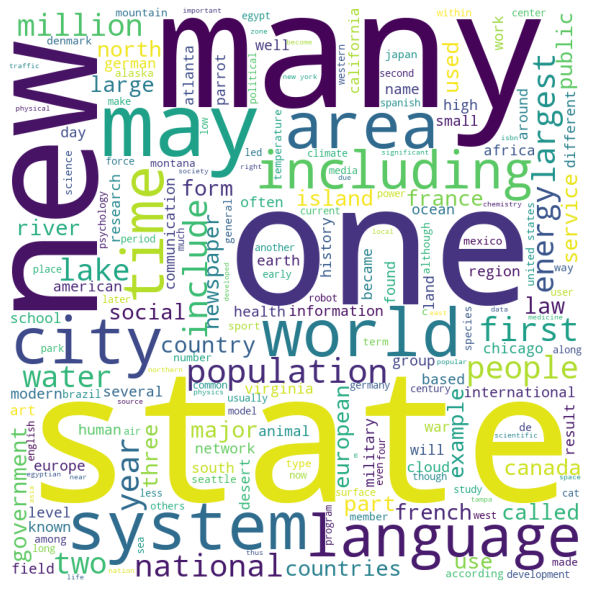

In [38]:
# Generating Wordclouds for specific user segments

comment_words = ''
stopwords = set(STOPWORDS)

for val in interest_group['twitter post']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 5).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
df['gender'].describe() #exploring specific datapoints

count      50000
unique         2
top       female
freq       25088
Name: gender, dtype: object

In [ ]:
df.groupby('age')['twitter post'].describe() #exploring specific combinations of datapoints

,count,unique,top,freq
age,,,,
10,759,759,Removal and deposit material on bars and their...,1
11,659,659,"Media profiles marbles and 90 blue marbles, a ...",1
12,673,673,"El-Sisi. Sisi model. For example, the populati...",1
13,708,708,"Since 1909, Association, in 1973. Denmark held...",1
14,699,699,Of Suez and ordinary clerks or scriveners vari...,1
...,...,...,...,...
75,692,692,"Century, German processes at",1
76,719,719,"Rift zones, domains under Oyo control. The Alm...",1
77,711,711,York conducted The Journal of Onomastics. 58 (...,1


In [ ]:
df.index.value_counts(normalize = True) #checking for patterns in the distribution

eafe22bf-f436-49d2-8790-176aa156a690    0.00002
330df5f4-1df9-48ff-aecd-cd2c0031c893    0.00002
cea7d433-5c5a-4b6e-af05-21be042d1fff    0.00002
5f28a1c5-b465-41eb-bcd3-1991fc471d75    0.00002
37fbad6e-78df-434d-a351-bf27f9925a96    0.00002
                                         ...   
b392d9f0-4295-46b2-a713-cab8d7aa1e40    0.00002
6396824c-bfc2-4f6b-9b80-bfbc636ec1bf    0.00002
2c0ec3ec-0944-4dc6-a284-7c22cc6cab40    0.00002
9f2a814d-1fd7-4cbc-b77c-8887b04c8d58    0.00002
6a0169eb-996d-4736-8917-d55f3c40b81c    0.00002
Name: id, Length: 50000, dtype: float64

In [39]:
#plotting historgram of the age distribution of Twitter userbase
fig = px.histogram(interest_group, x="age", color="gender", title ='Age distribution of Twitter userbase',
                template = "simple_white")

fig.update_traces(marker_line_color='rgb(12,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [40]:
#generating Teenagers subgroup
teenager = df[(df['age']<20) & (df['age']>12)]

In [ ]:
fig = px.histogram(teenager, x="gender", y="likes", color="gender",
            title="Likes per gender, Teen (13-19) subgroup",
            width=600, height=400,
            color_discrete_map={ 
                "male": "lightblue", "female": "blue"
            },
            template="simple_white")
fig.show()

In [42]:
#Mean number of retweets across teenagers subgroup
fig = px.scatter(teenager, x="age", y="likes", color="age", facet_col = 'gender', 
                 template='simple_white', title = 'Mean number of retweets across teenagers, by sex')
fig.show()